In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 가져오기
data = load_diabetes()

df_x =data.data
df_y = data.target


In [3]:
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [4]:
#train, test 데이터로 분리하기
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 123)

In [5]:
#모델에 입력할 데이터 X, y 준비하기
#df_x, df_y를 numpy array 형식으로 저장
print(f'type of df_x : {type(df_x)}')
print(f'type of df_y : {type(df_y)}')

type of df_x : <class 'numpy.ndarray'>
type of df_y : <class 'numpy.ndarray'>


In [6]:
# class MultiLinear:
#     def __init__(self, )

In [7]:
#모델 준비하기(입력 데이터 개수에 맞는 가중치 w,b 준비, 모델 함수 구현)
w = np.zeros(df_x.shape[0])
b = 0
def model(x, w, b):
    y = w * x + b
    return y   



In [8]:
#손실함수 loss 정의하기(mse)
def loss(x, y):
    pred = model(x, w, b)
    mse = ((pred - y) ** 2).mean()
    return mse


In [9]:
#기울기 구하는 gradient 함수 구현
def gradient(x, y):
    y_pred = model(x, w, b)
    w_grad = 2*x(y_pred-y)
    b_grad = 2*(y_pred-y)
    return w_grad, b_grad


In [10]:
#하이퍼 파라미터인 학습률 설정
lr = 0.01

In [11]:
#모델 학습

class MultiLinear:
    #모델 준비하기(입력 데이터 개수에 맞는 가중치 w,b 준비, 모델 함수 구현)
    def __init__(self, learning_rate=0.001):
        self.w =None
        self.b = None
        self.lr = learning_rate  #하이퍼 파라미터인 학습률 설정
        self.losses = []
        self.weight_history = []
        self.bias_history = []
         
        
    def forward(self,x):
        y_pred = np.dot(x,self.w) + self.b
        return y_pred
    #손실함수 loss 정의하기(mse)
    def loss(self, x, y):
        y_pred = self.forward(x)
        mse = ((y_pred-y) ** 2).mean()
        return mse
    
    
    #기울기 구하는 gradient 함수 구현
    def gradient(self, x, y):
        y_pred = self.forward(x)
        w_grad =2 * x *(y_pred-y)
        b_grad = 2 * (y_pred-y)
        return w_grad, b_grad
    
    def fit(self, x_data, y_data, epochs = 20):
        self.w = np.ones(x_data.shape[1])  #w  초깃값
        self.b = 0 # b 초깃값
        
        for epoch in range(epochs):
            l = 0  #loss 초깃값
            w_grad = np.zeros(x_data.shape[1]) #w 기울기 누적할 배열
            b_grad = 0 #b 기울기 누적할 배열
            
            
            for x, y in zip(x_data, y_data):
                l += self.loss(x, y)
                w_i, b_i = self.gradient(x, y)
                
                w_grad += w_i
                b_grad += b_i
                
            self.w -= self.lr * (w_grad/len(y_data)) # w_grad는 모든 샘플에 대한 gradient를 합친 값임으로 /len(y_data)를 하여 평균기울기를 빼주는 것임
            self.b -= self.lr * (b_grad/len(y_data))
        
        
            print(f'epoch ({epoch + 1}) ==> loss : {l/len(y_data): .5f}')
            self.losses.append(l/len(y_data))
            self.weight_history.append(self.w)
            self.bias_history.append(self.b)
            
            
    def predict(self,x_test):
        ypred = np.dot(x_test, self.w) + self.b
        return ypred 
    
    def metrics(self, x_test, y_test):
        y_pred = self.predict(x_test)
        mse = ((y_pred-y_test) ** 2).mean()
        return f'mse:{mse}'


In [12]:
#모델 학습
model = MultiLinear(learning_rate = 0.3)
model.fit(X_train, y_train, epochs = 1000)

epoch (1) ==> loss :  29051.84112
epoch (2) ==> loss :  9511.14965
epoch (3) ==> loss :  6365.54892
epoch (4) ==> loss :  5843.31463
epoch (5) ==> loss :  5741.00161
epoch (6) ==> loss :  5706.06184
epoch (7) ==> loss :  5682.08647
epoch (8) ==> loss :  5660.04821
epoch (9) ==> loss :  5638.50077
epoch (10) ==> loss :  5617.21079
epoch (11) ==> loss :  5596.13901
epoch (12) ==> loss :  5575.27724
epoch (13) ==> loss :  5554.62229
epoch (14) ==> loss :  5534.17179
epoch (15) ==> loss :  5513.92352
epoch (16) ==> loss :  5493.87529
epoch (17) ==> loss :  5474.02497
epoch (18) ==> loss :  5454.37042
epoch (19) ==> loss :  5434.90955
epoch (20) ==> loss :  5415.64027
epoch (21) ==> loss :  5396.56054
epoch (22) ==> loss :  5377.66831
epoch (23) ==> loss :  5358.96157
epoch (24) ==> loss :  5340.43835
epoch (25) ==> loss :  5322.09666
epoch (26) ==> loss :  5303.93457
epoch (27) ==> loss :  5285.95016
epoch (28) ==> loss :  5268.14151
epoch (29) ==> loss :  5250.50675
epoch (30) ==> loss : 

epoch (251) ==> loss :  3575.52483
epoch (252) ==> loss :  3572.79646
epoch (253) ==> loss :  3570.08609
epoch (254) ==> loss :  3567.39356
epoch (255) ==> loss :  3564.71871
epoch (256) ==> loss :  3562.06137
epoch (257) ==> loss :  3559.42140
epoch (258) ==> loss :  3556.79863
epoch (259) ==> loss :  3554.19290
epoch (260) ==> loss :  3551.60407
epoch (261) ==> loss :  3549.03197
epoch (262) ==> loss :  3546.47647
epoch (263) ==> loss :  3543.93741
epoch (264) ==> loss :  3541.41464
epoch (265) ==> loss :  3538.90802
epoch (266) ==> loss :  3536.41740
epoch (267) ==> loss :  3533.94264
epoch (268) ==> loss :  3531.48359
epoch (269) ==> loss :  3529.04013
epoch (270) ==> loss :  3526.61211
epoch (271) ==> loss :  3524.19939
epoch (272) ==> loss :  3521.80183
epoch (273) ==> loss :  3519.41931
epoch (274) ==> loss :  3517.05169
epoch (275) ==> loss :  3514.69883
epoch (276) ==> loss :  3512.36062
epoch (277) ==> loss :  3510.03691
epoch (278) ==> loss :  3507.72758
epoch (279) ==> loss

epoch (487) ==> loss :  3216.54478
epoch (488) ==> loss :  3215.70199
epoch (489) ==> loss :  3214.86235
epoch (490) ==> loss :  3214.02584
epoch (491) ==> loss :  3213.19245
epoch (492) ==> loss :  3212.36216
epoch (493) ==> loss :  3211.53495
epoch (494) ==> loss :  3210.71082
epoch (495) ==> loss :  3209.88973
epoch (496) ==> loss :  3209.07167
epoch (497) ==> loss :  3208.25663
epoch (498) ==> loss :  3207.44460
epoch (499) ==> loss :  3206.63554
epoch (500) ==> loss :  3205.82946
epoch (501) ==> loss :  3205.02633
epoch (502) ==> loss :  3204.22613
epoch (503) ==> loss :  3203.42886
epoch (504) ==> loss :  3202.63449
epoch (505) ==> loss :  3201.84301
epoch (506) ==> loss :  3201.05441
epoch (507) ==> loss :  3200.26867
epoch (508) ==> loss :  3199.48577
epoch (509) ==> loss :  3198.70570
epoch (510) ==> loss :  3197.92845
epoch (511) ==> loss :  3197.15400
epoch (512) ==> loss :  3196.38233
epoch (513) ==> loss :  3195.61343
epoch (514) ==> loss :  3194.84729
epoch (515) ==> loss

epoch (732) ==> loss :  3075.95019
epoch (733) ==> loss :  3075.56795
epoch (734) ==> loss :  3075.18683
epoch (735) ==> loss :  3074.80681
epoch (736) ==> loss :  3074.42789
epoch (737) ==> loss :  3074.05008
epoch (738) ==> loss :  3073.67336
epoch (739) ==> loss :  3073.29774
epoch (740) ==> loss :  3072.92321
epoch (741) ==> loss :  3072.54976
epoch (742) ==> loss :  3072.17739
epoch (743) ==> loss :  3071.80610
epoch (744) ==> loss :  3071.43589
epoch (745) ==> loss :  3071.06675
epoch (746) ==> loss :  3070.69867
epoch (747) ==> loss :  3070.33166
epoch (748) ==> loss :  3069.96571
epoch (749) ==> loss :  3069.60082
epoch (750) ==> loss :  3069.23698
epoch (751) ==> loss :  3068.87419
epoch (752) ==> loss :  3068.51244
epoch (753) ==> loss :  3068.15174
epoch (754) ==> loss :  3067.79208
epoch (755) ==> loss :  3067.43345
epoch (756) ==> loss :  3067.07586
epoch (757) ==> loss :  3066.71929
epoch (758) ==> loss :  3066.36375
epoch (759) ==> loss :  3066.00924
epoch (760) ==> loss

epoch (967) ==> loss :  3010.26517
epoch (968) ==> loss :  3010.06700
epoch (969) ==> loss :  3009.86936
epoch (970) ==> loss :  3009.67226
epoch (971) ==> loss :  3009.47570
epoch (972) ==> loss :  3009.27967
epoch (973) ==> loss :  3009.08416
epoch (974) ==> loss :  3008.88919
epoch (975) ==> loss :  3008.69474
epoch (976) ==> loss :  3008.50082
epoch (977) ==> loss :  3008.30742
epoch (978) ==> loss :  3008.11455
epoch (979) ==> loss :  3007.92219
epoch (980) ==> loss :  3007.73036
epoch (981) ==> loss :  3007.53904
epoch (982) ==> loss :  3007.34824
epoch (983) ==> loss :  3007.15796
epoch (984) ==> loss :  3006.96819
epoch (985) ==> loss :  3006.77893
epoch (986) ==> loss :  3006.59018
epoch (987) ==> loss :  3006.40194
epoch (988) ==> loss :  3006.21421
epoch (989) ==> loss :  3006.02698
epoch (990) ==> loss :  3005.84026
epoch (991) ==> loss :  3005.65404
epoch (992) ==> loss :  3005.46833
epoch (993) ==> loss :  3005.28311
epoch (994) ==> loss :  3005.09840
epoch (995) ==> loss

In [13]:
#test 데이터에 대한 성능 확인
prediction = model.predict(X_test)
print(prediction)
model.metrics(X_test, y_test)

[158.8432842  158.41215033 214.28391394 151.36662799 158.00047019
 148.26514429 240.44528629 120.3243183  125.90636285 103.34843666
 126.59195978 183.37337043 160.3424205  193.82662883 233.72051366
 176.1533001  119.76423743 131.78579655 173.43694971 188.31642907
 160.74405469 223.35774933 149.79653125  92.09948295 136.79273786
 184.66219032 105.54495927 104.32415061 154.40970312 181.3937409
 106.76474582 224.88203552 191.16066347 205.13665696 182.35224514
  93.66773154 101.56761661  94.24744269 225.17863536 108.73665424
 185.20550151  85.02874286  92.65991256 145.12027033 112.38311533
 208.1219753   80.37689716  95.11488778 110.5531899  213.40477668
  73.48225776 126.70994393 177.07409339 199.63160634 134.68600826
 201.20043154 206.32283876 177.38578841 182.26984267 176.25047197
 138.01542331 123.3613002  222.90160298 194.60767851 192.79778465
  60.10759993  65.39707031 156.3950193  146.19294214  89.84782804
 140.06310075  83.03978351 139.4520534  188.19184341 118.71728883
 173.992642

'mse:2989.534681716414'

In [14]:
#정답 데이터와 예측한 데이터 시각화

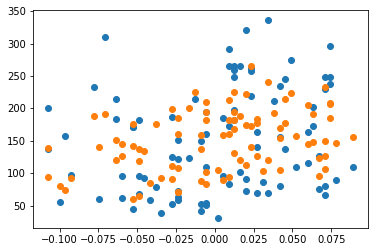

In [15]:
plt.figure()
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)